<a href="https://colab.research.google.com/github/ktripa/CPSC-8430-HW1/blob/main/Q1_2_MNIST_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mnist Handwrittern Data Set Classification**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from matplotlib import pyplot as plt
import os
from google.colab import files

**Load the MNIST Dataset using Keras library**

In [ ]:
mnist=keras.datasets.mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Normalize the DN values in each pixel 

In [ ]:
train_images= tf.keras.utils.normalize(train_images,axis=1)
test_images= tf.keras.utils.normalize(test_images,axis=1)

Let's look the data, how does it look like? 


The first handwrittern digit is : 5


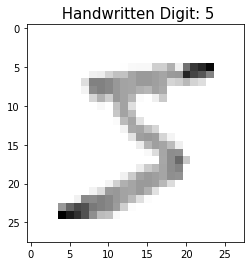

In [ ]:
plt.imshow(train_images[0],cmap=plt.cm.binary) # plot in greyscale
plt.title(" Handwritten Digit: 5", fontsize=15)
#plt.show()
print('The first handwrittern digit is :',  train_labels[0])
#plt.savefig("hwd.png")
#files.download("hwd.png")

# **Model training using Deep Neural Network**

**Varying the number of nodes in Hidden Layer 1**

In [ ]:
hid=[16,32,64,128]
history={}
for i in range(4):
  model=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(hid[i],activation=tf.nn.relu),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
  )
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history[i]= model.fit(train_images, train_labels, epochs=20,  validation_split=0.1,  batch_size=32)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7549 - accuracy: 0.7647 - val_loss: 0.2176 - val_accuracy: 0.9338
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2413 - accuracy: 0.9279 - val_loss: 0.1689 - val_accuracy: 0.9528
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1796 - accuracy: 0.9466 - val_loss: 0.1450 - val_accuracy: 0.9558
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1527 - accuracy: 0.9540 - val_loss: 0.1423 - val_accuracy: 0.9570
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1347 - accuracy: 0.9588 - val_loss: 0.1312 - val_accuracy: 0.9612
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1155 - accuracy: 0.9639 - val_loss: 0.1376 - val_accuracy: 0.9582
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1061 - accuracy: 0.9674 - val_loss: 0.1240 - val_accuracy:

 **Varying the Number of Nodes in Hidden layer 2**

In [ ]:
history1={}
for i in range(4):
  model1=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(hid[i],activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
  )
  model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history1[i]= model1.fit(train_images, train_labels, epochs=20,  validation_split=0.1,  batch_size=32)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6034 - accuracy: 0.8252 - val_loss: 0.1549 - val_accuracy: 0.9533
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1465 - accuracy: 0.9559 - val_loss: 0.1122 - val_accuracy: 0.9662
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0943 - accuracy: 0.9719 - val_loss: 0.0974 - val_accuracy: 0.9695
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9785 - val_loss: 0.0901 - val_accuracy: 0.9715
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0888 - val_accuracy: 0.9732
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0782 - val_accuracy: 0.9745
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.0784 - val_accuracy:

In [ ]:
validation_loss, validation_acc =model.evaluate(test_images,test_labels)
print('The validation loss is :',validation_loss)
print('The validation accuracy is :', validation_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.9741
The validation loss is : 0.14212960004806519
The validation accuracy is : 0.9740999937057495


In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

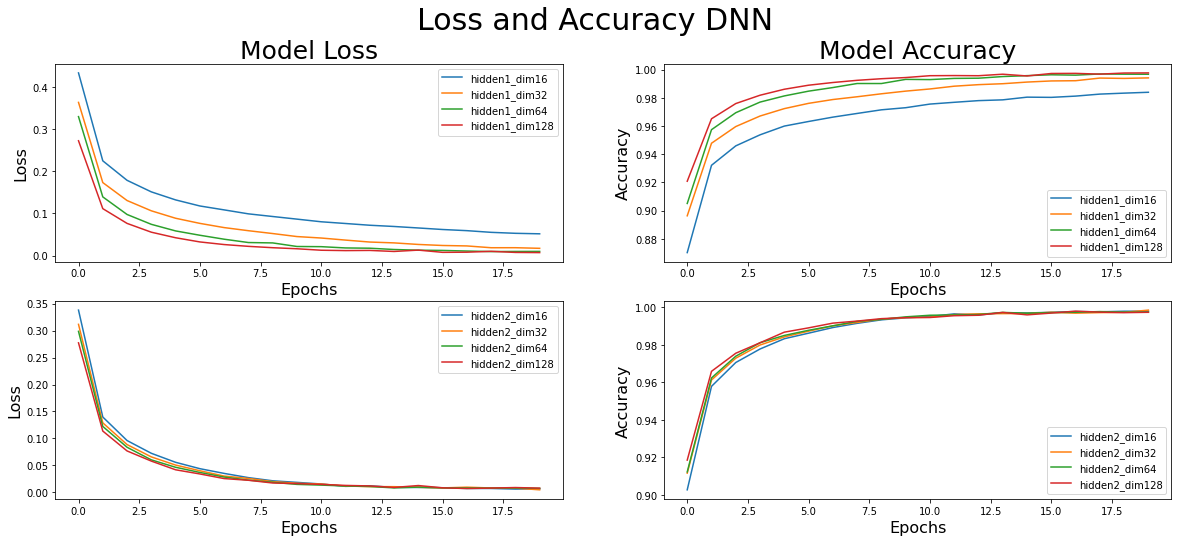

In [ ]:
fig =plt.figure(figsize=(20,8))
fig.suptitle('Loss and Accuracy DNN',fontsize=30)
#ax1
ax1 = fig.add_subplot(2,2,1)
ax1.plot(history[0].history['loss'],label='hidden1_dim16')
ax1.plot(history[1].history['loss'],label='hidden1_dim32')
ax1.plot(history[2].history['loss'],label='hidden1_dim64')
ax1.plot(history[3].history['loss'],label='hidden1_dim128')
ax1.set_title("Model Loss",fontsize=25)
ax1.set_xlabel('Epochs',fontsize=16)
ax1.legend(loc='best')
ax1.set_ylabel('Loss',fontsize=16)
#ax2
ax2 = fig.add_subplot(2,2,2)
ax2.plot(history[0].history['accuracy'],label='hidden1_dim16') 
ax2.plot(history[1].history['accuracy'],label='hidden1_dim32') 
ax2.plot(history[2].history['accuracy'],label='hidden1_dim64') 
ax2.plot(history[3].history['accuracy'],label='hidden1_dim128')    
ax2.set_title("Model Accuracy",fontsize=25)
ax2.set_xlabel('Epochs',fontsize=16)
ax2.legend(loc='best')
ax2.set_ylabel('Accuracy',fontsize=16)
#ax3
ax3 = fig.add_subplot(2,2,3)
ax3.plot(history1[0].history['loss'],label='hidden2_dim16')
ax3.plot(history1[1].history['loss'],label='hidden2_dim32')
ax3.plot(history1[2].history['loss'],label='hidden2_dim64')
ax3.plot(history1[3].history['loss'],label='hidden2_dim128')
ax3.set_xlabel('Epochs',fontsize=16)
ax3.legend(loc='best')
ax3.set_ylabel('Loss',fontsize=16)
#ax4
ax4 = fig.add_subplot(2,2,4)
ax4.plot(history1[0].history['accuracy'],label='hidden2_dim16') 
ax4.plot(history1[1].history['accuracy'],label='hidden2_dim32') 
ax4.plot(history1[2].history['accuracy'],label='hidden2_dim64') 
ax4.plot(history1[3].history['accuracy'],label='hidden2_dim128')    
ax4.set_xlabel('Epochs',fontsize=16)
ax4.legend(loc='best')
ax4.set_ylabel('Accuracy',fontsize=16)

# Show the figure
fig.show()
# Download the figure
fig.savefig("Q1_2_LossAcc.png")
files.download("Q1_2_LossAcc.png")



# **Model training with Convolutional neural networks (CNN)**

In [ ]:
x_train=train_images.reshape(60000,28,28,1)
y_train, y_test = train_labels, test_labels
x_test=test_images.reshape(10000,28,28,1)
hid1=[32,64,128]
history_CNN={}
# Define the model
for i in range(3):
  model_CNN= tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape= (28,28,1)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(hid1[i],activation='relu'),
     tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dense(10,activation='softmax')
    ] 
  )
  # train the model 
  model_CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  # fit the model
  history_CNN[i]= model_CNN.fit(x_train,y_train,epochs=10, validation_split=0.3,batch_size=32)
  #model_CNN.evaluate(x_test,y_test)


Epoch 1/10
1313/1313 [==============================] - 63s 48ms/step - loss: 0.5269 - accuracy: 0.8265 - val_loss: 0.1291 - val_accuracy: 0.9601
Epoch 2/10
1313/1313 [==============================] - 62s 48ms/step - loss: 0.0783 - accuracy: 0.9758 - val_loss: 0.0765 - val_accuracy: 0.9772
Epoch 3/10
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0695 - val_accuracy: 0.9782
Epoch 4/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0533 - val_accuracy: 0.9851
Epoch 5/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0556 - val_accuracy: 0.9842
Epoch 6/10
1313/1313 [==============================] - 64s 49ms/step - loss: 0.0214 - accuracy: 0.9925 - val_loss: 0.0716 - val_accuracy: 0.9820
Epoch 7/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0676 -

In [ ]:
model_CNN.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_79 (Dense)             (None, 128)             

ValueError: ignored

In [ ]:
fig =plt.figure(figsize=(20,8))
fig.suptitle('Loss and Accuracy in CNN',fontsize=30)
#ax1
ax1 = fig.add_subplot(1,2,1)
ax1.plot(history_CNN[0].history['loss'],label='hidden1_dim32')
ax1.plot(history_CNN[1].history['loss'],label='hidden1_dim64')
ax1.plot(history_CNN[2].history['loss'],label='hidden1_dim128')
ax1.set_title("Model Loss",fontsize=25)
ax1.set_xlabel('Epochs',fontsize=16)
ax1.legend(loc='best')
ax1.set_ylabel('Loss',fontsize=16)
#ax2
ax2 = fig.add_subplot(1,2,2)
ax2.plot(history_CNN[0].history['accuracy'],label='hidden1_dim32')  
ax2.plot(history_CNN[1].history['accuracy'],label='hidden1_dim64') 
ax2.plot(history_CNN[2].history['accuracy'],label='hidden1_dim128')    
ax2.set_title("Model Accuracy",fontsize=25)
ax2.set_xlabel('Epochs',fontsize=16)
ax2.legend(loc='best')
ax2.set_ylabel('Accuracy',fontsize=16)


# Show the figure
fig.show()
# Download the figure
fig.savefig("Q1_2_LossAccCNN.png")
files.download("Q1_2_LossAccCNN.png")


NameError: ignored